In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
import json

In [13]:
#1-Load Data

In [3]:
# Charger les données depuis le fichier
file_path= "customer_churn.txt"

# Lire les données JSON depuis le fichier
with open(file_path, 'r') as file:
    data_json = [json.loads(line) for line in file]

# Créer un DataFrame à partir des données JSON
data= pd.DataFrame(data_json)

In [4]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la colonne "Location"
data['Names'] = label_encoder.fit_transform(data['Names'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Onboard_date'] = label_encoder.fit_transform(data['Onboard_date'])
data['Company'] = label_encoder.fit_transform(data['Company'])

In [6]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,127,42.0,11066.80,0,7.22,8.0,634,81,325,1
1,519,41.0,11916.22,0,6.50,11.0,631,487,849,1
2,285,38.0,12884.75,0,6.67,12.0,871,114,499,1
3,698,42.0,8010.76,0,6.71,10.0,691,110,704,1
4,193,37.0,9191.58,0,5.56,9.0,838,607,458,1


In [9]:
data.shape

(900, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    int32  
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    int32  
 7   Location         900 non-null    int32  
 8   Company          900 non-null    int32  
 9   Churn            900 non-null    int64  
dtypes: float64(4), int32(4), int64(2)
memory usage: 56.4 KB


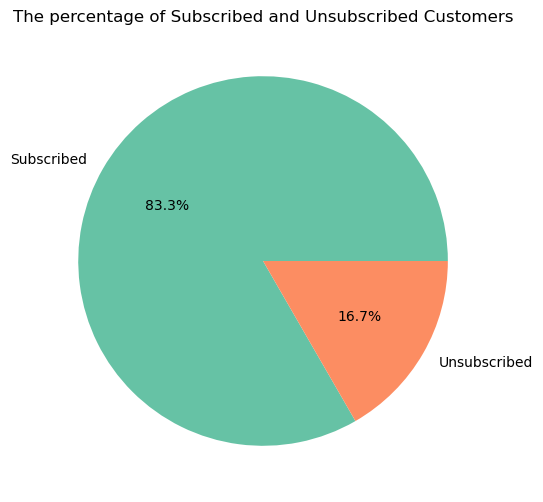

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre de clients abonnés et désabonnés
churn_counts = data['Churn'].value_counts()

# Remplacer les valeurs 0 et 1 par les étiquettes correspondantes
churn_counts.index = churn_counts.index.map({0: 'Subscribed', 1: 'Unsubscribed'})

# Créer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Ajouter un titre
plt.title('The percentage of Subscribed and Unsubscribed Customers')

# Afficher le diagramme
plt.show()


In [7]:
# Diviser les données en features (X) et labels (y)
X = data.drop('Churn', axis=1)  
y = data['Churn']

In [8]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Pre Processing

In [15]:
# Normaliser des données 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Classification

In [20]:
# Initialiser les classificateurs
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
lr_classifier = LogisticRegression()

# Entraîner les classificateurs
rf_classifier.fit(X_train_scaled, y_train)
svm_classifier.fit(X_train_scaled, y_train)
lr_classifier.fit(X_train_scaled, y_train)

# Faire des prédictions sur les ensembles de test
rf_predictions = rf_classifier.predict(X_test_scaled)
svm_predictions = svm_classifier.predict(X_test_scaled)
lr_predictions = lr_classifier.predict(X_test_scaled)

# Évaluer les classificateurs
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)


print("comparing accuracy ... ")
print("#######################")
print(rf_accuracy)
print(svm_accuracy)
print(lr_accuracy)
print("#######################")

comparing accuracy ... 
###############
0.8833333333333333
0.8611111111111112
0.9055555555555556
###############


In [19]:
# Sélectionner le meilleur classificateur
best_classifier = max([(rf_accuracy, 'Random Forest'), (svm_accuracy, 'SVM'), (lr_accuracy, 'Logistic Regression')])

print(f"The best classifier is {best_classifier[1]} with an accuracy of: {best_classifier[0]:.2f}\n")

The best classifier is Logistic Regression with an accuracy of: 0.91



In [23]:
# Sauvegarder le meilleur classificateur
if best_classifier[1] == 'Random Forest':
    best_model=joblib.dump(rf_classifier, 'best_model.pkl')
elif best_classifier[1] == 'SVM':
    best_model=joblib.dump(svm_classifier, 'best_model.pkl')
else:
    best_model=joblib.dump(lr_classifier, 'best_model.pkl')

In [25]:
##Prediction

In [24]:
# Charger le modèle depuis le fichier
loaded_model = joblib.load('best_model.pkl')

# Utiliser le modèle chargé pour faire des prédictions
loaded_model.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [26]:
#Tet with new customers

In [28]:
# Charger les données depuis le fichier de test
file_path= "new_customers.txt"

# Lire les données JSON depuis le fichier
with open(file_path, 'r') as file:
    data_json = [json.loads(line) for line in file]

# Créer un DataFrame à partir des données JSON
data_test= pd.DataFrame(data_json)

data_test

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37,9935.53,1,7.71,8,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23,7526.94,1,9.28,15,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65,100.00,1,1.00,15,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32,6487.50,0,9.40,14,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32,13147.71,1,10.00,8,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC
5,Jessica Drake,22,8445.26,1,3.46,14,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la colonne "Location"
data_test['Location'] = label_encoder.fit_transform(data_test['Location'])
data_test['Company'] = label_encoder.fit_transform(data_test['Company'])
data_test['Names'] = label_encoder.fit_transform(data_test['Names'])
data_test['Onboard_date'] = label_encoder.fit_transform(data_test['Onboard_date'])

In [30]:
data_test.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,0,37,9935.53,1,7.71,8,2,3,2
1,4,23,7526.94,1,9.28,15,4,2,1
2,1,65,100.00,1,1.00,15,0,0,0
3,3,32,6487.50,0,9.40,14,5,4,4
4,5,32,13147.71,1,10.00,8,3,5,5


In [35]:
# Faire des prédictions sur la nouvelle dataset
predictions_new = lr_classifier.predict(data_test)
predictions_neww = rf_classifier.predict(data_test)
predictions_newww = svm_classifier.predict(data_test)
best_prediction = loaded_model.predict(data_test)
# Afficher les prédictions
print(predictions_new)
print(predictions_neww)
print(predictions_neww)
print(best_prediction)

[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]


C:\Users\lg\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\lg\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\lg\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\lg\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
